# Drawing Quantum Circuits
## By: Javier Orduz



1. [Packages](#packages)
1. [References](#references)
1. [Things to install](#install)


A (pure) quantum ```Circuit``` is simply a recipe with qubits as ingredients and ```QuantumGate``` boxes as cooking steps. A quantum gate is defined by a number of qubits and a unitary matrix.

# 1. Packages

1. We import modules and packages needed to run the quantum and data things

In [1]:
from discopy.quantum import qubit, H, Id, CX, QuantumGate
import numpy as np

2. we define the gate, Hadamard gate.

In [2]:
assert H == QuantumGate("H", 1, 1 / np.sqrt(2) * np.array([1, 1, 1, -1]), _dagger=None)

3. We create the quantum circuit, multiply by identity, and then entangle with other qubit using a Controlled-NOT gate (CX).
Mathematical representation for $H$ and $CX$
$$
H = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1&1\\
1&-1\\
\end{pmatrix}, ~~~~~~~~~~
I = 
\begin{pmatrix}
1&0\\
0&1\\
\end{pmatrix}
$$
and 
$$
CX = 
\begin{pmatrix}
1&0&0&0\\
0&1&0&0\\
0&0&0&1\\
0&0&1&0\\
\end{pmatrix},
$$ 
respectively. Where $H$ is to implement superposition, $I$ is the neutral element (product), and we can think about $CX$ in a similar classical way as control operations. 


In [3]:
circuit = H @ Id(qubit) >> CX

4. We draw the circuit.

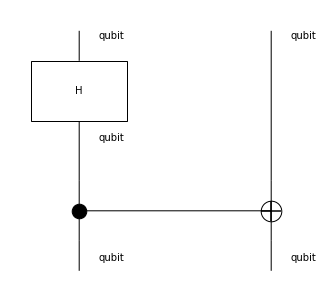

In [4]:
circuit.draw(figsize=(4, 4), draw_type_labels=True, margins=(.1, .1))

A pure quantum circuit can be evaluated as a ```Tensor``` object, i.e. it is a subclass of ```tensor.Diagram```.

In [5]:
from discopy import Dim, Tensor

assert H.eval() == H.array
assert Id(qubit).eval() == Tensor.id(Dim(2))

assert circuit.eval() == H.eval() @ Id(qubit).eval() >> CX.eval()

Pure quantum circuits are reversible. We call the reverse of a circuit its dagger, written with the operator 
```python
[::-1]
```

CX >> H @ Id(1)


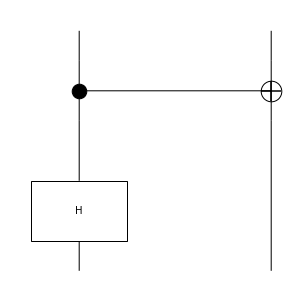

In [6]:
print(circuit[::-1])

circuit[::-1].draw(figsize=(4, 4), margins=(.1,.1))

In [7]:
assert (CX >> CX[::-1]).eval() == Id(qubit ** 2).eval()
assert np.all(np.isclose((H >> H[::-1]).eval(), Id(qubit).eval()))

To simulate the quantum state that the circuit produces, we need to pre-compose it with a ```Ket```, i.e. we need to initialize some ```qubits``` before we apply our circuit. In our example ```circuit``` is $$\frac{1}{\sqrt{2}}\big(\ket{00}+\ket{11}\big),$$ which is a Bell state.

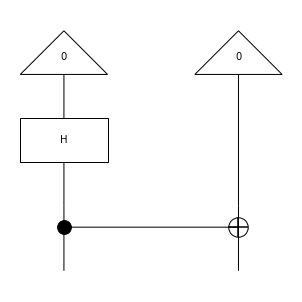

In [8]:
from discopy.quantum import Ket

(Ket(0, 0) >> circuit).draw(figsize=(4, 4))

and

In [9]:
(Ket(0, 0) >> circuit).eval()

Tensor(dom=Dim(1), cod=Dim(2, 2), array=[0.70710678+0.j, 0.    +0.j, 0.    +0.j, 0.70710678+0.j])

To compute the probability of a particular measurement result, we need to post-compose our circuit with a ```Bra```, the dagger of ```Ket```, then apply the Born rule.

amplitude:


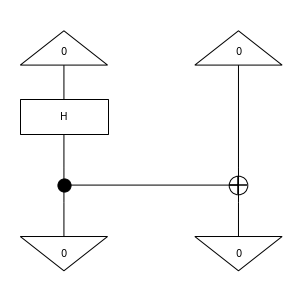

probability: 0.4999999999999999


In [10]:
from discopy.quantum import Bra

experiment = Ket(0, 0) >> circuit >> Bra(0, 0)

print("amplitude:")
experiment.draw(figsize=(4, 4))
amplitude = experiment.eval().array

probability = abs(amplitude) ** 2
print("probability: {}".format(probability))

If we want to get the probability distribution over bitstrings, we need to leave the realm of purity to consider **mixed** quantum circuits with both bit and qubit ingredients. The **Measure** box has ```dom = qubit``` and ```cod = bit```. Another example of a mixed box is ```Discard``` which computes a partial trace over a qubit. Mixed circuits cannot be evaluated as a unitary matrix anymore. Instead whenever the circuit is mixed, ```circuit.eval()``` outputs a ```CQMap```: a ```numpy.ndarray``` with axes for the classical and quantum dimensions of the circuit.

In [11]:
from discopy.quantum import Measure, Discard

print(Discard().eval())
print(Measure().eval())

CQMap(dom=Q(Dim(2)), cod=CQ(), array=[1.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])
CQMap(dom=Q(Dim(2)), cod=C(Dim(2)), array=[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])


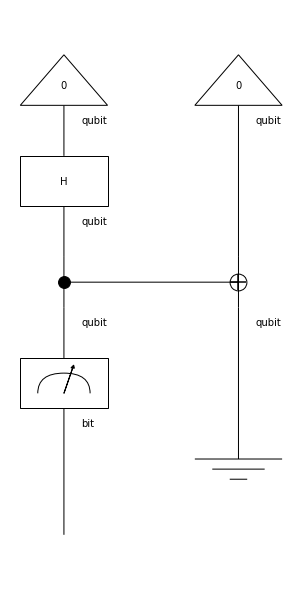

CQMap(dom=CQ(), cod=C(Dim(2)), array=[0.5+0.j, 0.5+0.j])

In [12]:
(Ket(0, 0) >> circuit >> Measure() @ Discard()).draw(figsize=(4, 8))
(Ket(0, 0) >> circuit >> Measure() @ Discard()).eval()

Note that as for diagrams of cooking recipes, we need to introduce swaps in order to apply two-qubit gates to non-adjacent qubits. These swaps have no physical meaning, they are just an artefact of drawing circuits in 2 dimensions rather than 4. Indeed, we can forget about swaps by compiling our planar diagram into the graph-based data structure of $t\ket{\text{ket}}$.

In [13]:
from discopy.quantum import SWAP #import pytket as to_tk #import numpy as np #from numpy.typing import ArrayLike

circuit.to_tk()

tk.Circuit(2).H(0).CX(0, 1)

In [14]:
(SWAP >> circuit >> SWAP).to_tk()

tk.Circuit(2).H(1).CX(1, 0)

We can execute our circuit on a $t\ket{\text{ket}}$. backend (simulator) by passing it as a parameter to ```eval```.

In [15]:
from pytket.extensions.qiskit import AerBackend
aer = AerBackend()

(circuit >> Measure() @ Discard()).eval(backend=aer)

Tensor(dom=Dim(1), cod=Dim(2), array=[0.46972656+0.j, 0.53027344+0.j])

# Package versions<a name="packages"></a>

In [16]:
from platform import python_version
import pytket
import qiskit

print("python version: ", python_version())
print("pytket version: ", pytket.__version__)
print("qiskit version: ", qiskit.__version__)

python version:  3.8.5
pytket version:  1.0.1
qiskit version:  0.19.2


# Bibliography<a name="references"></a>

[1] [Discopy](https://github.com/oxford-quantum-group/discopy)

[2] [QNLP tutorial](https://discopy.readthedocs.io/en/main/notebooks/qnlp-tutorial.html)

# Things to install<a name="install"></a>

Nest lines seem needed.


```python
!pip install pytket-qiskit 
!pip install pytket 
!pip install qiskit 
!pip3 install pytket-pyzx
!pip install pytket-qiskit
```

<!--
#from pytket.extensions.qiskit import IBMQBackend, AerStateBackend, AerBackend
#from pytket.extensions.qiskit import AerBackend
#dev_b = IBMQBackend("ibmq_quito")
-->